# Test PERMANOVA accuracy on simulated data



Tested with qiime2-amplicon-2023.9



## Check available files

In [1]:
from os import listdir
import pandas as pd

data_dir = "."
listdir(data_dir)

['.Rhistory',
 'feature_table.qza',
 'Literature',
 'simulate_correlated_traits.R',
 'feature_table_hdf5.biom',
 'modeltestdata_BM.csv',
 'modeltestdata_OU_a1.csv',
 'permanova.ipynb',
 'modeltestdata_BM_1000.csv',
 'modeltestdata_OU_a0.5.csv',
 'feature_table.csv',
 '.RData',
 'huang_roy_molecular_r2.newick',
 '.ipynb_checkpoints',
 'modeltestdata_correlated_traits.csv',
 'modeltestdata_phylo_VCV.csv']

## Import QIIME2 and plugins

In [2]:
import qiime2
print(qiime2.__version__)

from qiime2.plugins import feature_table
#from qiime2.plugins import (demux, dada2, metadata, feature_table,
                            #fragment_insertion, diversity, 
                            #longitudinal, phylogeny, sample_classifier,
                            #feature_classifier, taxa, composition, 
                            #longitudinal)

from math import floor

ModuleNotFoundError: No module named 'qiime2'

In [ ]:
feature_data_fp = 'modeltestdata_BM_1000.csv'
feature_data = pd.read_csv(feature_data_fp)
print(feature_data.columns)



feature_data['Unnamed: 0']
feature_data = feature_data.rename(columns = {'Unnamed: 0':'#OTU ID'})
feature_data = feature_data.set_index('#OTU ID')


def convert_trait_to_count(trait,base=2,n_seqs = 10**7):
    """ Convert a trait (value -inf to +inf) to a microbiome count
    """
    new_trait = (base**trait)*n_seqs
    new_trait = new_trait.apply(floor)
    return new_trait

feature_data = feature_data.apply(convert_trait_to_count)
#columns = list(feature_data.columns)
#columns[0] = 'Taxa'
#feature_data.columns = columns
print(feature_data)
feature_data.transpose().to_csv("feature_table.csv",sep="\t")

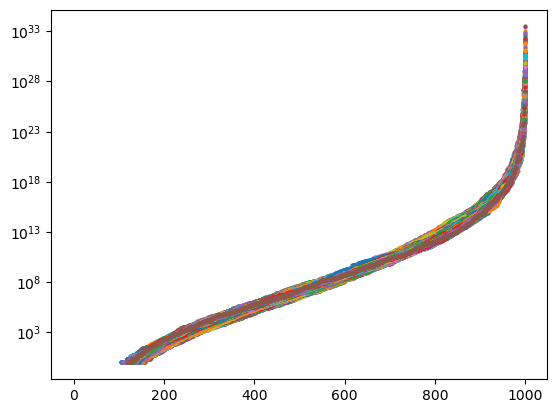

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
for species in feature_data.index:
    y = sorted(list(feature_data.loc[species,:]))
    plt.scatter(range(len(y)),y, s = 4)
    plt.yscale("log")

In [73]:
!biom convert -i feature_table.csv -o feature_table_hdf5.biom --table-type="OTU table" --to-json

In [77]:

!qiime tools import --input-path feature_table_hdf5.biom --type 'FeatureTable[Frequency]' --input-format BIOMV100Format --output-path feature_table.qza
!qiime tools validate feature_table.qza

feature_table = qiime2.Artifact.load("feature_table.qza")

Imported feature_table_hdf5.biom as BIOMV100Format to feature_table.qza
Result feature_table.qza appears to be valid at level=max.


TypeError: No format: BIOMV210DirFmt

TypeError: No format: BIOMV210DirFmt

In [52]:
dir(qiime2.plugins)

['ArtifactAPIUsage',
 'ArtifactAPIUsageVariable',
 'QIIMEArtifactAPIImporter',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_canonical_module',
 'available_plugins',
 'composition',
 'dada2',
 'dataclass',
 'demux',
 'diversity',
 'feature_classifier',
 'feature_table',
 'fragment_insertion',
 'importlib',
 'longitudinal',
 'metadata',
 'phylogeny',
 're',
 'sample_classifier',
 'sys',
 'usage']

In [46]:
feature_table = qiime2.Artifact.import_data(type="FeatureTable[Frequency]",view="feature_table_hdf5.biom")

TypeError: Semantic type FeatureTable[Frequency] is invalid, either because it doesn't have a compatible directory format, or because it's not registered.

In [39]:


sequence_depth = 10000
feature_table = feature_table.rarefy(sequence_depth)
# rarefy?
# calculate beta diversity distance matrix
# Add metadata???
# PERMANOVA

TypeError: Semantic type FeatureTable[Frequency] is invalid, either because it doesn't have a compatible directory format, or because it's not registered.

In [ ]:
## Make a beta diversity distance matrix with Bray-Curtis

## Can include a metadata file with taxonomy